- 강남구/동작구/서대문구 착한가격음식점이랑 일반음식점이랑 외식비가격 비교하기
- : 일반음식점의 가격이 외식비가격의 평균보다 낮다면 어느정도 물가안정에 도움이 된다고 판단
-     그게 아니라면 큰 의미는 없다고 판단

In [1]:
import pandas as pd
import numpy as np

In [20]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [208]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [15]:
kind_table = pd.read_csv('./datas/서울시 착한가격음식점(라벨링).csv', encoding='cp949',index_col=0)
kind_table.columns

Index(['업소명', '분류코드', '분류코드명', '업소 주소', '업소 전화번호', '찾아오시는 길', '업소정보', '자랑거리',
       '추천수', '기준년월', '업소 사진', '위도', '경도', '행정구', '행정동', '검색명', '식당아이디', '별점',
       '상품명', '상품가격(일반)(원)', '메뉴라벨링', '외식비'],
      dtype='object')

In [17]:
k_kind_table = kind_table[kind_table['행정구']=='강남구']
d_kind_table = kind_table[kind_table['행정구']=='동작구']
s_kind_table = kind_table[kind_table['행정구']=='서대문구']

In [18]:
k_kind_table.index = [i for i in range(len(k_kind_table))]
d_kind_table.index = [i for i in range(len(d_kind_table))]
s_kind_table.index = [i for i in range(len(s_kind_table))]

- 착한가격음식점 메뉴별 가격평균

In [70]:
k_kind_table = k_kind_table[['업소명','메뉴라벨링','상품가격(일반)(원)']]

In [71]:
d_kind_table = d_kind_table[['업소명','메뉴라벨링','상품가격(일반)(원)']]
s_kind_table = s_kind_table[['업소명','메뉴라벨링','상품가격(일반)(원)']]

In [72]:
k_kind_table.rename(columns={'상품가격(일반)(원)':'가격정보'},inplace=True)
d_kind_table.rename(columns={'상품가격(일반)(원)':'가격정보'},inplace=True)
s_kind_table.rename(columns={'상품가격(일반)(원)':'가격정보'},inplace=True)

In [286]:
s_kind_table[s_kind_table['메뉴라벨링']=='김치찌개백반']

,업소명,메뉴라벨링,가격정보
20,연희골굼터,김치찌개백반,6000.0
21,춘천식당,김치찌개백반,5000.0
22,엉터리돼지갈비,김치찌개백반,4000.0
23,어가네,김치찌개백반,5000.0
24,엉터리돼지갈비,김치찌개백반,4000.0


In [73]:
k_kind_pivot_table = k_kind_table.pivot_table("가격정보",index="메뉴라벨링")
d_kind_pivot_table = d_kind_table.pivot_table("가격정보",index="메뉴라벨링")
s_kind_pivot_table = s_kind_table.pivot_table("가격정보",index="메뉴라벨링")

In [287]:
s_kind_pivot_table = s_kind_table.pivot_table("가격정보",index="메뉴라벨링")
s_kind_pivot_table

,가격정보
메뉴라벨링,
김밥,1000.0
김치찌개백반,4800.0
냉면,4500.0
비빔밥,4250.0
삼겹살,8150.0
자장면,3000.0
칼국수,4250.0


In [74]:
s_kind_pivot_table

,가격정보
메뉴라벨링,
김밥,1000.0
김치찌개백반,4800.0
냉면,4500.0
비빔밥,4250.0
삼겹살,8150.0
자장면,3000.0
칼국수,4250.0


- 일반음식점 메뉴별 가격평균

In [ ]:
k_general_table = pd.read_csv('./datas/강남구 표본(메뉴라벨링).csv', encoding='cp949')
d_general_table = pd.read_csv('./datas/동작구 표본(메뉴라벨링).csv', encoding='cp949')

In [314]:
s_general_table = pd.read_csv('./datas/서대문구 표본(메뉴라벨링).csv', encoding='cp949')

In [244]:
k_general_table.rename(columns={'메뉴 라벨링':'메뉴라벨링'},inplace=True)

In [245]:
k_general_table.head()

,상세영업상태명,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,업소URL,대표메뉴,가격정보,메뉴라벨링
0,영업,5183692,21.00,135838.0,서울특별시 강남구 대치동 626-0번지 지하1층 38호,서울특별시 강남구 남부순환로 2917 (대치동지하1층 38호),6280.0,청실식당,2.010000e+13,I,2018-08-31 23:59,한식,205154.6381,443439.9816,한식,3.600399e+07,김치찌개,"7,000원",김치찌개
1,영업,NaN,29.02,135840.0,서울특별시 강남구 대치동 894,서울특별시 강남구 삼성로85길 33 지상1층 107호 (대치동),6196.0,면전,2.020000e+13,I,2021-03-20 0:22,한식,204776.5483,444677.6430,한식,1.828930e+09,물총조개칼국수,"9,000원",칼국수
2,영업,NaN,30.00,135822.0,서울특별시 강남구 논현동 140-3번지,서울특별시 강남구 강남대로128길 22 1층 102호 (논현동),6114.0,청량리 광주냉면,2.010000e+13,I,2018-08-31 23:59,한식,202062.6380,445318.2373,한식,1.054384e+09,열무냉면,"6,000원",냉면
3,영업,2,129.37,135998.0,서울특별시 강남구 대치동 937-0번지 롯데백화점 지하1층,서울특별시 강남구 도곡로 401 (대치동롯데백화점 지하1층),6206.0,예촌,2.010000e+13,I,2018-08-31 23:59,한식,204669.5434,443873.6212,한식,3.671174e+07,전주비빔밥,"11,000원",비빔밥
4,영업,NaN,40.04,135190.0,서울특별시 강남구 세곡동 587번지,서울특별시 강남구 헌릉로569길 9 지상1층 106호 (세곡동 강남 지웰파인즈),6376.0,본죽앤 비빔밥,2.020000e+13,U,2020-02-19 2:40,한식,208859.4800,440518.1100,한식,1.297284e+07,해물 약고추장비빔밥,"10,000원",비빔밥


In [305]:
s_general_table[s_general_table['메뉴라벨링']=='김치찌개백반']

,사업장명,메뉴라벨링,가격정보
16,진주식당,김치찌개백반,7000
17,동경집,김치찌개백반,6000
18,시골농장,김치찌개백반,7000


In [246]:
k_general_table = k_general_table[['사업장명','메뉴라벨링','가격정보']]
k_general_table

,사업장명,메뉴라벨링,가격정보
0,청실식당,김치찌개,"7,000원"
1,면전,칼국수,"9,000원"
2,청량리 광주냉면,냉면,"6,000원"
3,예촌,비빔밥,"11,000원"
4,본죽앤 비빔밥,비빔밥,"10,000원"
...,...,...,...
75,청담동장독대김치찌개,김치찌개,"9,000원"
76,행복한 김치찌개,김치찌개,"7,000원"
77,초가집 삼계탕,삼계탕,"15,000원"
78,상황버섯삼계탕,삼계탕,"15,000원"


In [ ]:
d_general_table = d_general_table[['사업장명','메뉴라벨링','가격정보']]

In [315]:
s_general_table = s_general_table[['사업장명','메뉴라벨링','가격정보']]

In [53]:
# 7,000원 숫자 7000으로 만드는 코드
int("".join(k_general_table['가격정보'][0][:-1].split(',')))

7000

In [293]:
s_general_table['가격정보'].unique()

array(['7,000원', '14,000원', '14000', '12000', '9,900원', '7500', '5,900원',
       '13,000원', '15,000원', '6,000원', '10,000원', '8,000원', '7000',
       '5,000원', '6,500원', '5,500원', '15000', '3500', '8,500원', '변동',
       '20,000원', '3,000원', '2,000원'], dtype=object)

In [294]:
s_general_table[s_general_table['가격정보']=='변동']

,사업장명,메뉴라벨링,가격정보
29,김가네,김밥,변동


In [316]:
s_general_table.drop(29,inplace=True)

In [312]:
type(int(s_general_table['가격정보'][18]))

int

In [317]:
price_list = []
for price in s_general_table['가격정보'] :
    if price[-1] == '원' :
        price_list.append(int("".join(price[:-1].split(','))))
    else :
        price_list.append(int(price))

In [318]:
len(price_list)

34

In [319]:
len(s_general_table)

34

In [320]:
s_general_table['가격정보'] = price_list

In [265]:
k_general_table

,사업장명,메뉴라벨링,가격정보
0,청실식당,김치찌개,7000
1,면전,칼국수,9000
2,청량리 광주냉면,냉면,6000
3,예촌,비빔밥,11000
4,본죽앤 비빔밥,비빔밥,10000
...,...,...,...
75,청담동장독대김치찌개,김치찌개,9000
76,행복한 김치찌개,김치찌개,7000
77,초가집 삼계탕,삼계탕,15000
78,상황버섯삼계탕,삼계탕,15000


In [66]:
type(s_general_table['가격정보'][0])

numpy.int64

In [ ]:
k_general_pivot_table = k_general_table.pivot_table("가격정보",index="메뉴라벨링")
d_general_pivot_table = d_general_table.pivot_table("가격정보",index="메뉴라벨링")

In [321]:
s_general_pivot_table = s_general_table.pivot_table("가격정보",index="메뉴라벨링")

In [322]:
s_general_pivot_table

,가격정보
메뉴라벨링,
김밥,6000.000000
김치찌개백반,6666.666667
냉면,6500.000000
비빔밥,8333.333333
삼겹살,10845.454545
삼계탕,15000.000000
자장면,5500.000000
칼국수,6600.000000


In [96]:
eating = pd.read_csv('./datas/외식비(22년 7월)(한국소비자원).csv' , encoding='cp949')
eating

,번호,지역,냉면,비빔밥,김치찌개백반,삼겹살(환산전),삼겹살(환산후),자장면,삼계탕,칼국수,김밥
0,1,서울,10423,9654,7423,15231,18056,6300,15385,8385,2969
1,2,광주,9100,8700,7800,13600,14244,6100,15000,8000,2900
2,3,대구,10167,8717,7167,10917,14932,6083,15000,6500,2500
3,4,대전,9000,9700,7000,13800,17383,5800,14200,7400,2800
4,5,부산,10143,8071,7000,10786,15429,6000,15000,6571,2714
5,6,울산,8900,8600,7400,9600,16344,6300,14200,8100,2800
6,7,인천,9667,8150,7333,14650,16200,6000,14667,7917,2800
7,8,강원,8889,8944,7667,14667,14877,5889,14778,8333,2867
8,9,경기,9414,8241,7431,15034,16874,6241,15345,8103,2966
9,10,경남,9385,8077,7577,10677,16506,5615,15154,6885,3177


In [103]:
# s = eating.loc[0]

In [106]:
# s.to_frame(name='가격정보')

,가격정보
번호,1
지역,서울
냉면,10423
비빔밥,9654
김치찌개백반,7423
삼겹살(환산전),15231
삼겹살(환산후),18056
자장면,6300
삼계탕,15385
칼국수,8385


In [107]:
eating = eating.loc[[0]]

In [108]:
eating

,번호,지역,냉면,비빔밥,김치찌개백반,삼겹살(환산전),삼겹살(환산후),자장면,삼계탕,칼국수,김밥
0,1,서울,10423,9654,7423,15231,18056,6300,15385,8385,2969


In [160]:
e = eating[['냉면','비빔밥','김치찌개백반','자장면','삼계탕','칼국수','김밥']]

In [161]:
e = e.T

In [186]:
e = e.sort_index()
e

,0
김밥,2969
김치찌개백반,7423
냉면,10423
비빔밥,9654
삼계탕,15385
자장면,6300
칼국수,8385


In [190]:
e.rename(columns={0:'가격정보'},inplace=True)

- 착한가격음식점 삼겹살 없애기 삼계탕 있는애들 삼계탕도 없애기
- : 삼겹살은 가격을 비교하기에 g단위가 달라서 모호하고
 삼계탕은 비교대상이 없거나 적어서 제외

In [174]:
k_kind_pivot_table.drop("삼겹살",inplace=True)

In [176]:
d_kind_pivot_table.drop(["삼겹살","삼계탕"],inplace=True)

In [328]:
s_kind_pivot_table.drop("삼겹살",inplace=True)

In [267]:
k_general_pivot_table.drop("삼계탕",inplace=True)

In [275]:
d_general_pivot_table.drop("삼계탕",inplace=True)

KeyError: "['삼계탕'] not found in axis"

In [277]:
d_general_pivot_table.drop("삼겹살",inplace=True)

In [324]:
s_general_pivot_table.drop("삼계탕",inplace=True)

In [325]:
s_general_pivot_table.drop("삼겹살",inplace=True)

In [188]:
e.drop("삼계탕",inplace=True)

- 착한가격음식점, 일반음식점, 외식비 비교 그래프 그리기

In [127]:
k_kind_pivot_table
d_kind_pivot_table
s_kind_pivot_table
k_general_pivot_table
d_general_pivot_table
s_general_pivot_table
e

,0
냉면,10423
비빔밥,9654
김치찌개백반,7423
삼겹살,18056
자장면,6300
삼계탕,15385
칼국수,8385
김밥,2969


In [327]:
print(len(s_kind_pivot_table))
print(len(s_general_pivot_table))
print(len(e))

7
6
6


In [147]:
k_kind_pivot_table.to_numpy()[0][0]

2750.0

In [195]:
ls = k_kind_pivot_table['가격정보'].values[0]
ls

2750.0

In [270]:
k_compare = pd.DataFrame({
    '착한가격업소': k_kind_pivot_table['가격정보'].values,
    '일반음식점' : k_general_pivot_table['가격정보'].values,
    '외식비':e['가격정보'].values,
    '메뉴' : e.index
},columns=['착한가격업소','일반음식점','외식비','메뉴'])
k_compare

,착한가격업소,일반음식점,외식비,메뉴
0,2750.000000,3280.000000,2969,김밥
1,6078.947368,8045.454545,7423,김치찌개백반
2,7000.000000,10772.727273,10423,냉면
3,6068.965517,11100.000000,9654,비빔밥
4,4916.666667,6545.454545,6300,자장면
5,6192.307692,9062.500000,8385,칼국수


([<matplotlib.axis.XTick at 0x18198edbeb0>,
 [Text(0, 0, '김밥'),
  Text(0, 0, '김치찌개백반'),
  Text(0, 0, '냉면'),
  Text(0, 0, '비빔밥'),
  Text(0, 0, '자장면'),
  Text(0, 0, '칼국수')])

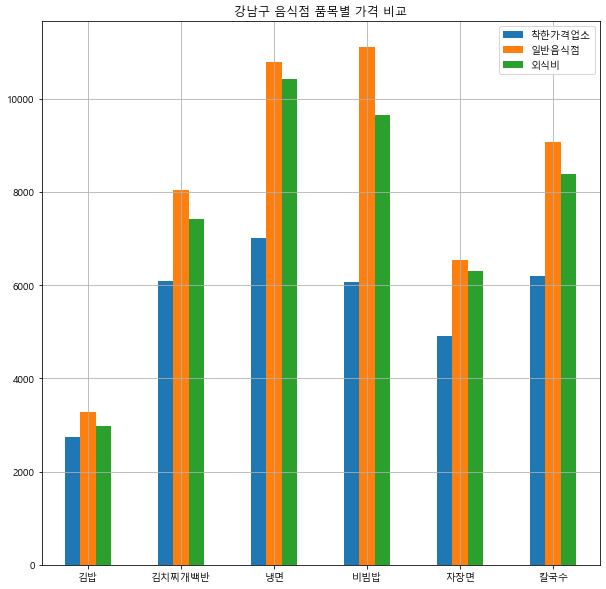

In [271]:
x=[0,1,2,3,4,5] #xticks 시 위치 표시에 사용할 변수

#df로 막대그래프 그리기 첫번째 방법
k_compare.plot(kind='bar',grid=True,figsize=(10,10))
plt.title('강남구 음식점 품목별 가격 비교')
plt.xticks(x,k_compare.메뉴,rotation='horizontal')

([<matplotlib.axis.XTick at 0x18198f66af0>,
 [Text(0, 0, '김밥'),
  Text(0, 0, '김치찌개백반'),
  Text(0, 0, '냉면'),
  Text(0, 0, '비빔밥'),
  Text(0, 0, '자장면'),
  Text(0, 0, '칼국수')])

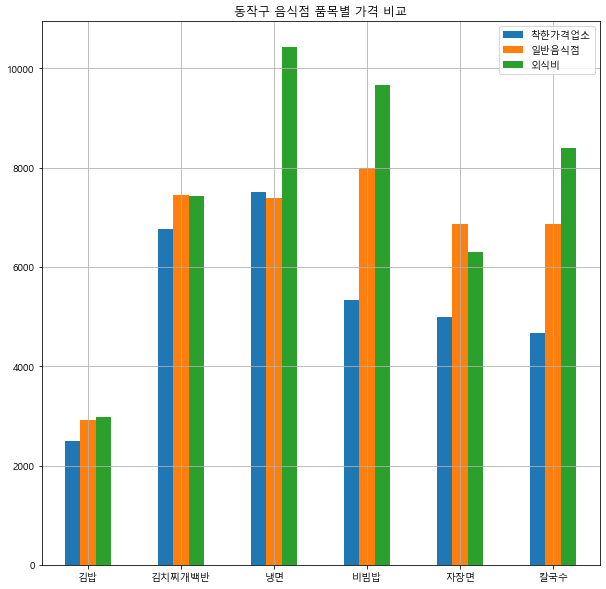

In [280]:
d_compare = pd.DataFrame({
    '착한가격업소': d_kind_pivot_table['가격정보'].values,
    '일반음식점' : d_general_pivot_table['가격정보'].values,
    '외식비':e['가격정보'].values,
    '메뉴' : e.index
},columns=['착한가격업소','일반음식점','외식비','메뉴'])
d_compare

x=[0,1,2,3,4,5] #xticks 시 위치 표시에 사용할 변수

#df로 막대그래프 그리기 첫번째 방법
d_compare.plot(kind='bar',grid=True,figsize=(10,10))
plt.title('동작구 음식점 품목별 가격 비교')
plt.xticks(x,d_compare.메뉴,rotation='horizontal')

([<matplotlib.axis.XTick at 0x1819a09ae50>,
 [Text(0, 0, '김밥'),
  Text(0, 0, '김치찌개백반'),
  Text(0, 0, '냉면'),
  Text(0, 0, '비빔밥'),
  Text(0, 0, '자장면'),
  Text(0, 0, '칼국수')])

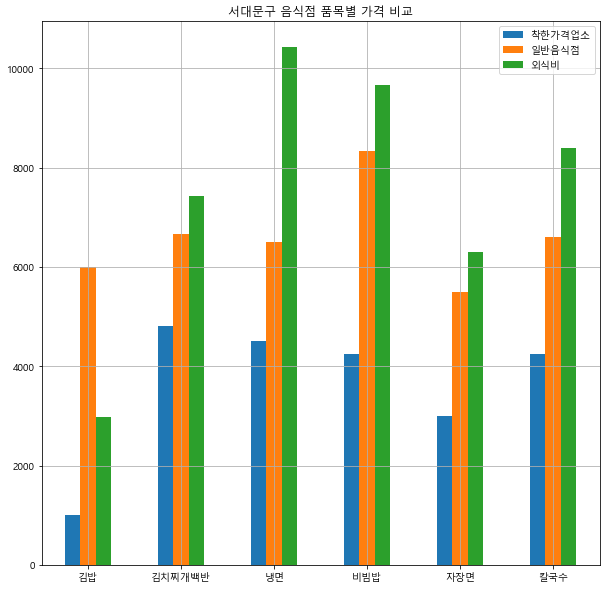

In [329]:
s_compare = pd.DataFrame({
    '착한가격업소': s_kind_pivot_table['가격정보'].values,
    '일반음식점' : s_general_pivot_table['가격정보'].values,
    '외식비':e['가격정보'].values,
    '메뉴' : e.index
},columns=['착한가격업소','일반음식점','외식비','메뉴'])
s_compare

x=[0,1,2,3,4,5] #xticks 시 위치 표시에 사용할 변수

#df로 막대그래프 그리기 첫번째 방법
s_compare.plot(kind='bar',grid=True,figsize=(10,10))
plt.title('서대문구 음식점 품목별 가격 비교')
plt.xticks(x,s_compare.메뉴,rotation='horizontal')

In [331]:
k_compare.to_csv('./datas/강남구 음식점 품목별 가격 비교.csv', encoding='cp949')

In [332]:
d_compare.to_csv('./datas/동작구 음식점 품목별 가격 비교.csv', encoding='cp949')

In [333]:
s_compare.to_csv('./datas/서대문구 음식점 품목별 가격 비교.csv', encoding='cp949')